# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?


1. **What methods are best for identifying outliers?**

We have several statistical techniques at our disposal to detect outliers:

   - **Visual methods**: Using plots like Box plots and scatter plots, we can get visual indications that might highlight extreme values in our data.
   
   - **Z-Score**: Z-score is a statistical measurement that describes a value's relationship to the mean of a group of values. Any point that falls outside of 3 standard deviations might be considered an outlier by us.
   
   - **IQR (Interquartile Range) Method**: In this method, an outlier is any value that falls below Q1 – 1.5*IQR or above Q3 + 1.5*IQR.

   - **Isolation Forests**: This is a machine learning method for detecting anomalies. It isolates outliers in such a way that the number of splits required to isolate a sample is proportional to the anomaly score.

   - **DBScan Clustering**: This is another machine learning method that groups together points with many nearby neighbors. Outliers are points that lie alone in low-density regions.

2. **How do we make the decision to keep or exclude outliers from any future models?**

Our decision to keep or exclude outliers largely depends on the context, our understanding of the domain, and the objectives of our analysis or model. 

   - **Domain knowledge**: If an outlier represents an error in data collection or entry, or it is not theoretically possible (e.g., negative height), then it makes sense for us to remove these outliers. 

   - **Objective of model**: If our model aims to predict rare events (e.g., fraud detection, anomaly detection), then those outliers are not only important but are actually the events we are trying to model. In this case, we would keep them.

   - **Effect on the model**: Outliers can significantly impact the performance of certain types of models (e.g., linear regression models), especially when the number of outliers is high. In this case, it might be worth considering robust modeling techniques or transformations to reduce the influence of outliers.

   - **Outlier explanation**: If the outlier can be explained by variables not in our model or data, it may be best to remove them, especially if the purpose of our model is to understand the relationships between our predictors.

Remember, there is no universally correct approach to dealing with outliers - it depends on the context and the specific details of our data. It's always a good idea for us to perform sensitivity analysis with and without the outliers, to understand their impact on our model's results.



### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd 
import numpy as np
# Import packages for data visualization
### YOUR CODE HERE ###
import seaborn as sns
from matplotlib import pyplot as plt

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [3]:
# Display and examine the first few rows of the dataframe
### YOUR CODE HERE ###
data.head(10)
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [4]:
# Get the size of the data
### YOUR CODE HERE ###

data.size

232584

In [5]:
# Get the shape of the data
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
### YOUR CODE HERE ###
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Generate a table of descriptive statistics
### YOUR CODE HERE ### 
    
#Calculate the average video view count for each claim status:

claim_status = data.groupby('claim_status')['video_view_count'].mean()

# Calculate the total video view, like, share, download and comment count for each verified status:
activity = data.groupby('verified_status')[['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']].sum()

#Find the maximum video duration for each author ban status:
ban_status = data.groupby('author_ban_status')['video_duration_sec'].max()


print(claim_status)

print(activity)

print(ban_status)



claim_status
claim      501029.452748
opinion      4956.432250
Name: video_view_count, dtype: float64
                 video_view_count  video_like_count  video_share_count  \
verified_status                                                          
not verified         4.751131e+09      1.572465e+09        311465741.0   
verified             1.097270e+08      3.640516e+07          7909738.0   

                 video_download_count  video_comment_count  
verified_status                                             
not verified               19597539.0            6504420.0  
verified                     429776.0             161853.0  
author_ban_status
active          60
banned          60
under review    60
Name: video_duration_sec, dtype: int64


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


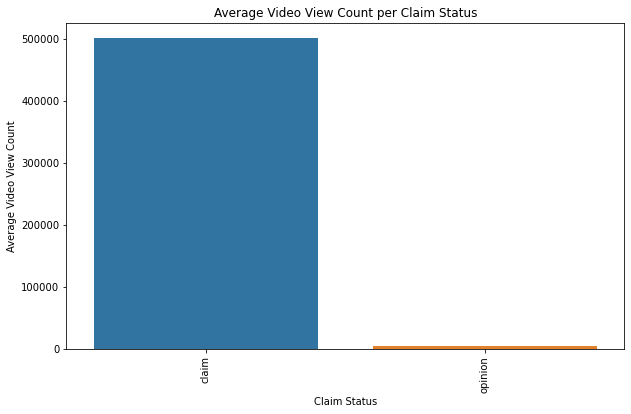

In [9]:
avg_view_count = data.groupby('claim_status')['video_view_count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='claim_status', y='video_view_count', data=avg_view_count)
plt.title('Average Video View Count per Claim Status')
plt.ylabel('Average Video View Count')
plt.xlabel('Claim Status')
plt.xticks(rotation=90)
plt.show()


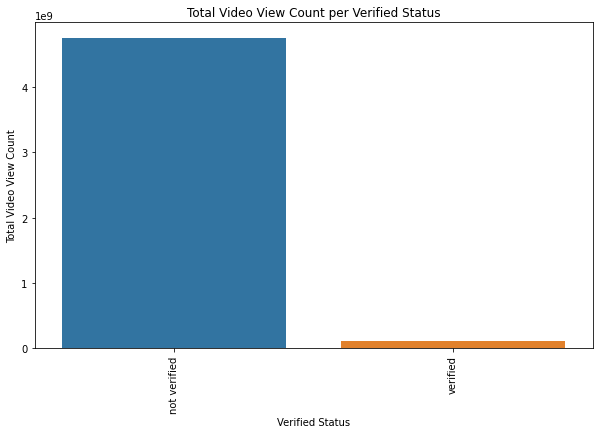

In [10]:
total_view_count = data.groupby('verified_status')['video_view_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='verified_status', y='video_view_count', data=total_view_count)
plt.title('Total Video View Count per Verified Status')
plt.ylabel('Total Video View Count')
plt.xlabel('Verified Status')
plt.xticks(rotation=90)
plt.show()

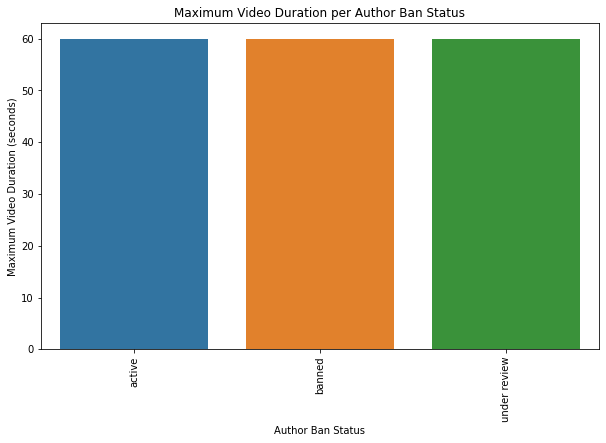

In [11]:
max_duration = data.groupby('author_ban_status')['video_duration_sec'].max().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='author_ban_status', y='video_duration_sec', data=max_duration)
plt.title('Maximum Video Duration per Author Ban Status')
plt.ylabel('Maximum Video Duration (seconds)')
plt.xlabel('Author Ban Status')
plt.xticks(rotation=90)
plt.show()


==> ENTER YOUR RESPONSE HERE

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

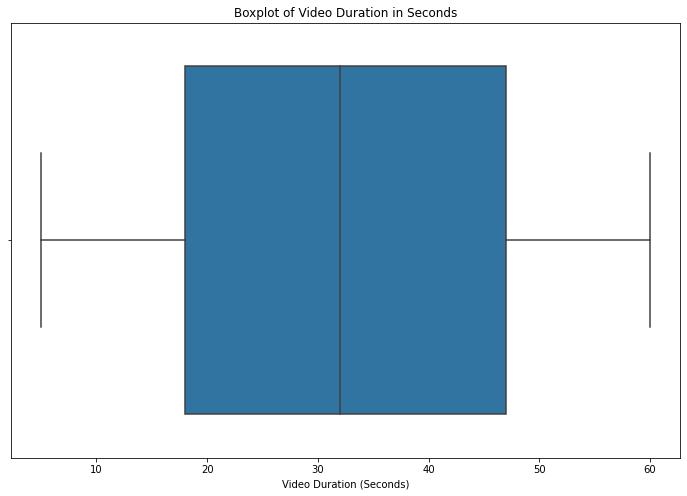

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['video_duration_sec'])
plt.title('Boxplot of Video Duration in Seconds')
plt.xlabel('Video Duration (Seconds)')
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

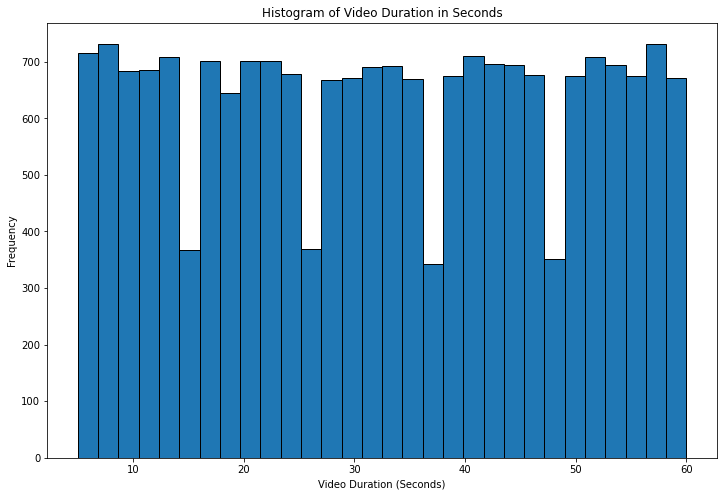

In [13]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
plt.hist(data['video_duration_sec'], bins=30, edgecolor='black')
plt.title('Histogram of Video Duration in Seconds')
plt.xlabel('Video Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

**Question:** What do you notice about the duration and distribution of the videos?

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

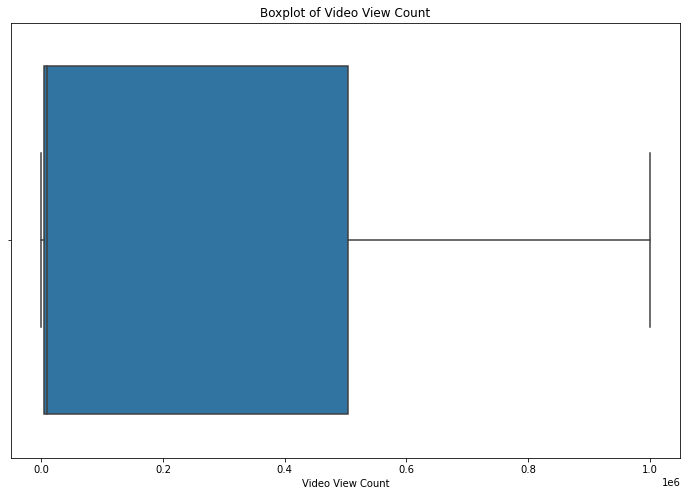

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['video_view_count'])
plt.title('Boxplot of Video View Count')
plt.xlabel('Video View Count')
plt.show()


In [15]:
import matplotlib.ticker as ticker

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.1f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])



Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

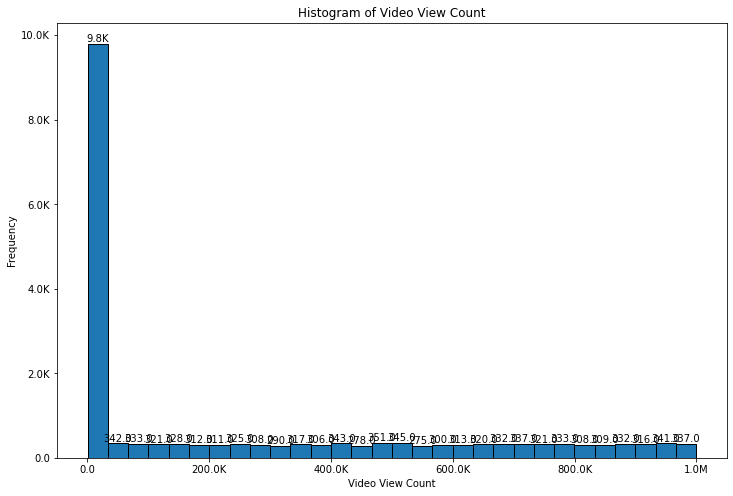

In [16]:
# Create a histogram

plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['video_view_count'], bins=30, edgecolor='black')
plt.title('Histogram of Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Frequency')

# Change the x-axis formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: human_format(x)))

# Change the y-axis formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: human_format(x)))

# Label x-axis with bin values
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    plt.annotate(human_format(count), xy=(x, count), xycoords=('data', 'data'),
                 xytext=(0, 10), textcoords='offset points', va='top', ha='center')

plt.show()


**Question:** What do you notice about the distribution of this variable?

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

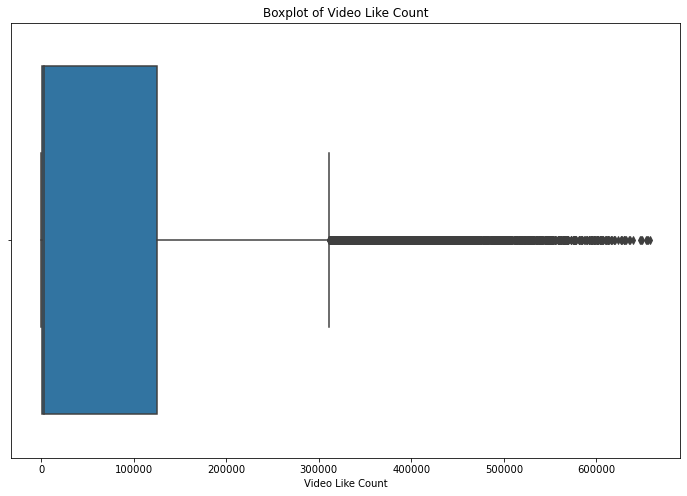

In [17]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['video_like_count'])
plt.title('Boxplot of Video Like Count')
plt.xlabel('Video Like Count')
plt.show()


Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

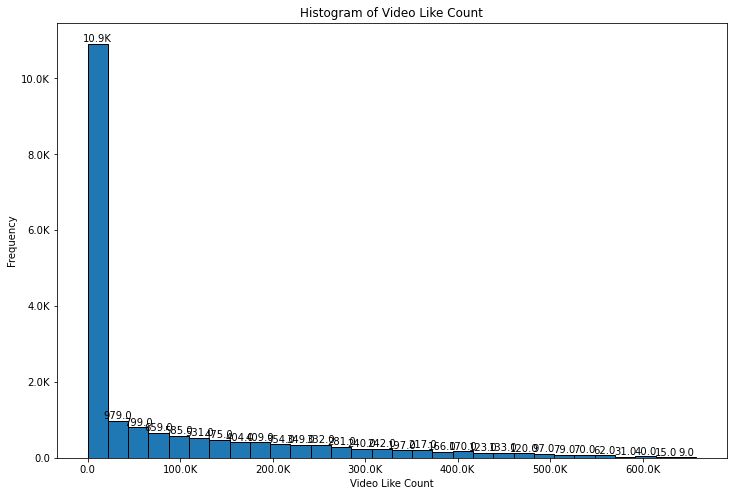

In [18]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['video_like_count'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Video Like Count')
plt.xlabel('Video Like Count')
plt.ylabel('Frequency')

# Change the x-axis formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: human_format(x)))

# Change the y-axis formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: human_format(x)))

# Label x-axis with bin values
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    plt.annotate(human_format(count), xy=(x, count), xycoords=('data', 'data'),
                 xytext=(0, 10), textcoords='offset points', va='top', ha='center')

plt.show()


**Question:** What do you notice about the distribution of this variable?

the variable is right-skewed or positively skewed distribution.

A right-skewed distribution often occurs when the data has a lower bound (such as zero) but no upper bound. In this case, the video_like_count cannot be less than zero but could theoretically be very high. This is common in many real-world situations, such as population age, income distributions, or social media engagements.

The skewness in the data might indicate that most videos get a relatively small number of likes, with a few videos getting a large number of likes. This could be due to a few "viral" videos that have gained significantly more popularity than the others. The plateau could represent a consistent rate at which these viral videos receive likes.

This kind of data could be particularly sensitive to outliers as we've seen from our boxplot(high amount of outliers), and standard measures of central tendency such as the mean could be heavily influenced by these extreme values. we might want to consider using the median as a measure of central tendency instead.

Additionally, skewed data might require specific statistical techniques when modeling or forecasting. Some statistical techniques assume that the data is normally distributed, and applying these techniques to skewed data without an appropriate transformation could lead to bias or misleading results. Depending on your exact use case, you might need to consider log transformations or other techniques to normalize the data.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

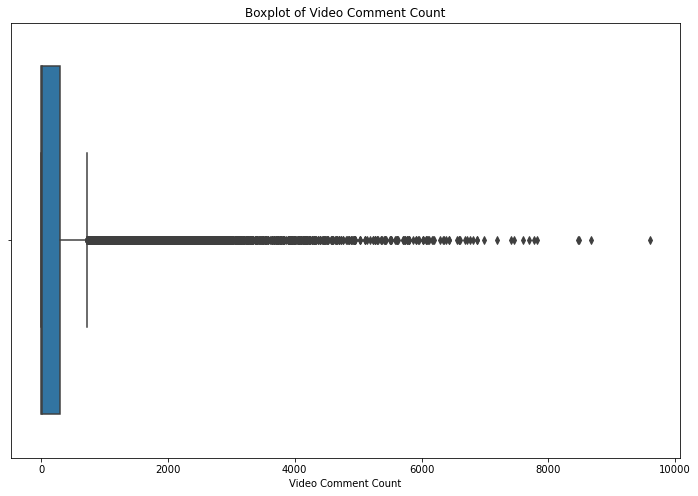

In [19]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['video_comment_count'])
plt.title('Boxplot of Video Comment Count')
plt.xlabel('Video Comment Count')
plt.show()



Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

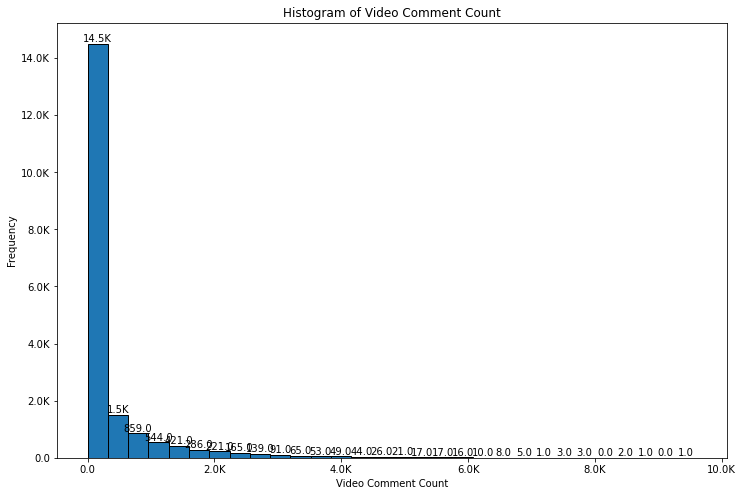

In [20]:
# Create a histogram
### YOUR CODE HERE ###

plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['video_comment_count'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Video Comment Count')
plt.xlabel('Video Comment Count')
plt.ylabel('Frequency')

# Change the x-axis formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: human_format(x)))

# Change the y-axis formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: human_format(x)))

# Label x-axis with bin values
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    plt.annotate(human_format(count), xy=(x, count), xycoords=('data', 'data'),
                 xytext=(0, 10), textcoords='offset points', va='top', ha='center')

plt.show()


**Question:** What do you notice about the distribution of this variable?

the video_comment_count data is highly skewed to the right, with a long tail of outlier values extending to the right.

The box itself, which spans from around 0 to about 200, represents the interquartile range (IQR) of the data. The bottom of the box is the first quartile (Q1, or the 25th percentile), and the top of the box is the third quartile (Q3, or the 75th percentile). This means that about half of the data (the middle 50%) lies within this box.

The first line within the box represents the median (or the second quartile, Q2), which is the middle value of the dataset. It seems like this line is near the lower end of the box, which suggests that the median value is closer to the 25th percentile than the 75th percentile.

The dots or points we see above the box are outliers, which are typically defined as observations that fall below Q1 - 1.5IQR or above Q3 + 1.5IQR.

This visualization gives us several insights about the video_comment_count data:

1. Majority of videos have relatively few comments (within the box range).
2. The median number of comments is even fewer (where the line inside the box is).
3. There are quite a few videos with a significantly higher number of comments than most (the outliers).

Given these observations, it's likely that most videos have a low to moderate number of comments, but a few videos--the outliers--have gone 'viral' and attracted a significantly higher number of comments.

Remember that in skewed distributions the mean (average) can be significantly influenced by outliers and may not accurately represent the 'typical' observation. Instead, the median, which is not affected by outliers, might be a more representative measure of central tendency for this data.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

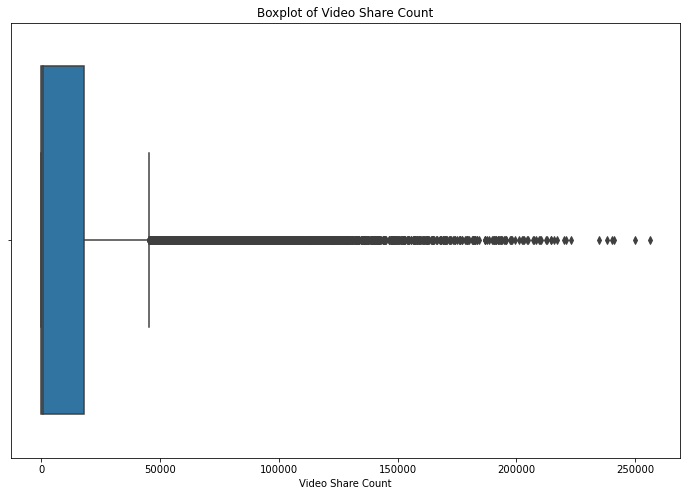

In [21]:
# Create a boxplot to visualize distribution of `video_share_count`
### YOUR CODE HERE ###

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['video_share_count'])
plt.title('Boxplot of Video Share Count')
plt.xlabel('Video Share Count')
plt.show()


*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

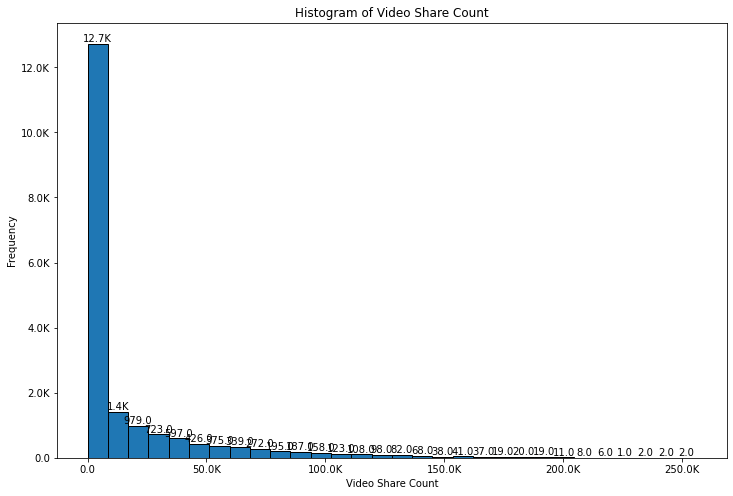

In [22]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['video_share_count'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Video Share Count')
plt.xlabel('Video Share Count')
plt.ylabel('Frequency')

# Change the x-axis formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: human_format(x)))

# Change the y-axis formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: human_format(x)))

# Label x-axis with bin values
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    plt.annotate(human_format(count), xy=(x, count), xycoords=('data', 'data'),
                 xytext=(0, 10), textcoords='offset points', va='top', ha='center')

plt.show()


**Question:** What do you notice about the distribution of this variable?

 If we're talking about video share counts, this distribution could suggest that a majority of videos get shared only a few times, while a smaller number of videos become very popular and get shared many times. This sort of distribution is fairly common in social media and other "viral" phenomena, where a few items (e.g., videos, posts, news stories) gain a lot of attention, but most get little notice.

If we need to use this data for modeling purposes, we might need to apply some kind of transformation to the data to reduce the skewness, such as taking the logarithm, the square root, or using a method like Box-Cox transformation.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

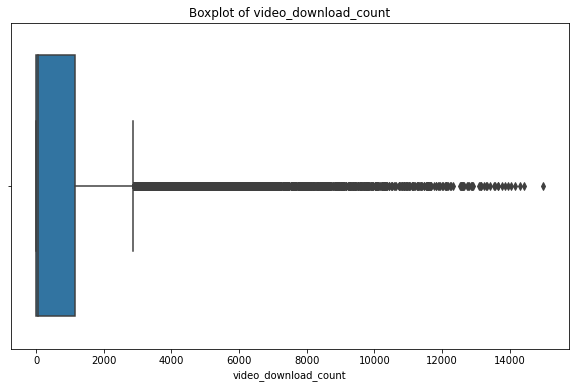

In [23]:
# Create a boxplot to visualize distribution of `video_download_count`
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.boxplot(x = data['video_download_count'])
plt.title('Boxplot of video_download_count')
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

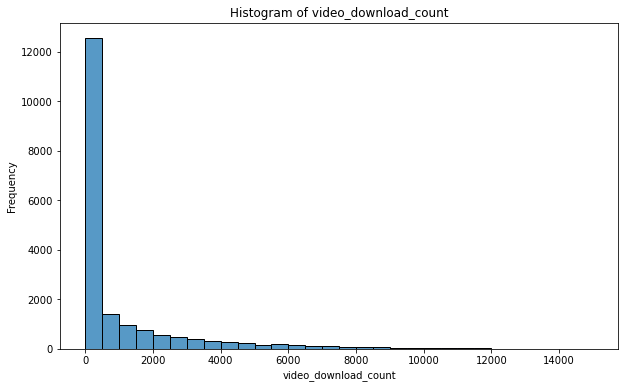

In [24]:
# Create a histogram
### YOUR CODE HERE ###
# Set the size of the plot
plt.figure(figsize=(10,6))

# Plot histogram using seaborn
sns.histplot(data=data, x='video_download_count', bins=30, kde=False)

# Set title and labels
plt.title('Histogram of video_download_count')
plt.xlabel('video_download_count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Question:** What do you notice about the distribution of this variable?

Based on your descriptions, both video_download_count and video_view_count appear to have similar distributions. This similarity is not surprising, as more views on a video can naturally lead to more downloads, especially if the content is engaging or beneficial to the viewer.

The positive skewness suggests that while most videos have low to moderate download or view counts, there are a few videos that manage to get extraordinarily high counts. These could be viral videos, videos from popular creators, videos that got boosted due to platform algorithms, or videos that were shared widely outside of the platform.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

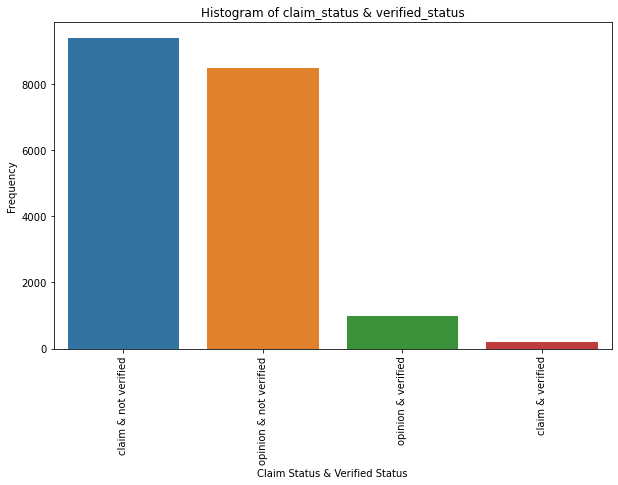

In [25]:
# Create a histogram
### YOUR CODE HERE ###

df = data

# Add a new column to the DataFrame for the combinations
df['claim_verification_status'] = df['claim_status'] + ' & ' + df['verified_status']

# Count the occurrences of each combination
counts = df['claim_verification_status'].value_counts()

# Create a DataFrame from these counts
counts_df = counts.reset_index()
counts_df.columns = ['claim_verification_status', 'count']

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=counts_df, x='claim_verification_status', y='count')

# Set title and labels
plt.title('Histogram of claim_status & verified_status')
plt.xlabel('Claim Status & Verified Status')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()



**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

there are a significantly higher number of unverified accounts engaging with the platform.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

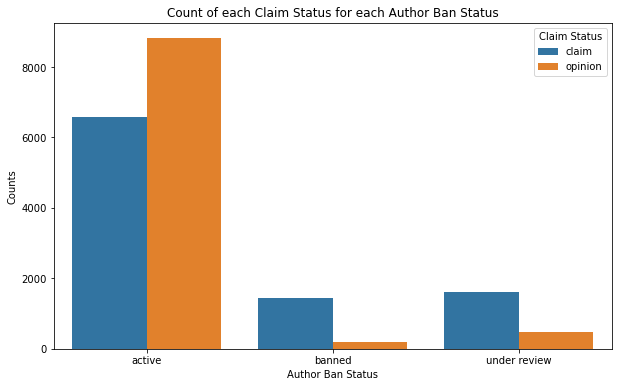

In [26]:
# Create a histogram
### YOUR CODE HERE ###


# We first need to get the count of each claim_status for each author_ban_status
count_df = df.groupby(['author_ban_status', 'claim_status']).size().reset_index(name='counts')

# Now we can plot this using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='author_ban_status', y='counts', hue='claim_status', data=count_df)

plt.xlabel('Author Ban Status')
plt.ylabel('Counts')
plt.title('Count of each Claim Status for each Author Ban Status')
plt.legend(title='Claim Status')
plt.show()



**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions? 

There is a substantially higher amount of active authors than banned ones, but active authors have high opinion claim status, and banned ones have higher claim. I thought it was an interesting detail.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

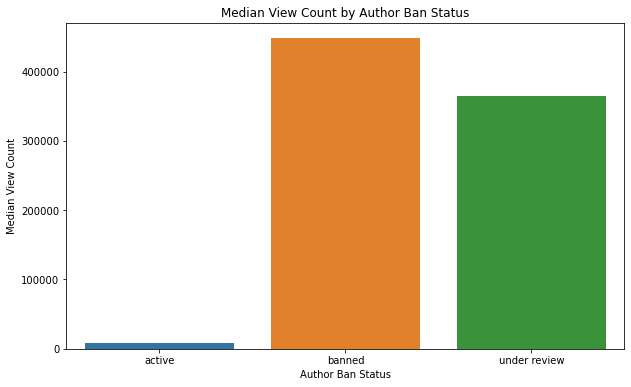

In [27]:
# Create a bar plot
df = data
### YOUR CODE HERE ###
# Group by 'author_ban_status' and get the median 'video_view_count'
median_df = df.groupby('author_ban_status')['video_view_count'].median().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='author_ban_status', y='video_view_count', data=median_df)

plt.xlabel('Author Ban Status')
plt.ylabel('Median View Count')
plt.title('Median View Count by Author Ban Status')
plt.show()

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

Clickbait Content: Authors who are banned or under review may be creating content that is controversial or clickbait-like to generate a large number of views. This could potentially violate the platform's guidelines, leading to their ban.

Highly Engaging but Inappropriate Content: It could also be possible that these authors are creating content that is highly engaging but crosses the line of what is considered appropriate content by the platform, leading to a high number of views but also a ban or under review status.

As an analyst, these insights would be interesting to further investigate, such as reviewing the content of the videos from the banned authors or authors under review, and finding commonalities among them. This could also inform strategies to better manage content on the platform to balance user engagement with content appropriateness.

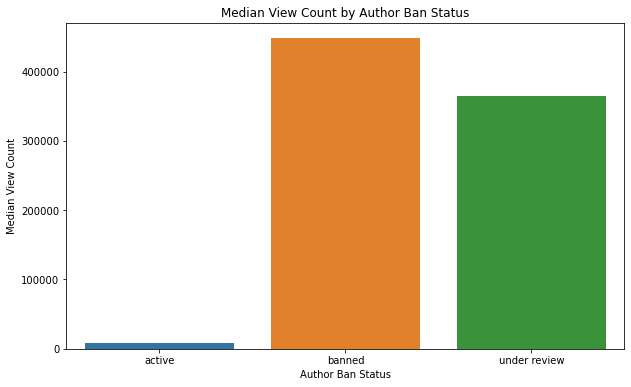

In [28]:
# Calculate the median view count for claim status.
### YOUR CODE HERE ###

# Group by 'author_ban_status' and get the median 'video_view_count'
median_df = df.groupby('author_ban_status')['video_view_count'].median().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='author_ban_status', y='video_view_count', data=median_df)

plt.xlabel('Author Ban Status')
plt.ylabel('Median View Count')
plt.title('Median View Count by Author Ban Status')
plt.show()


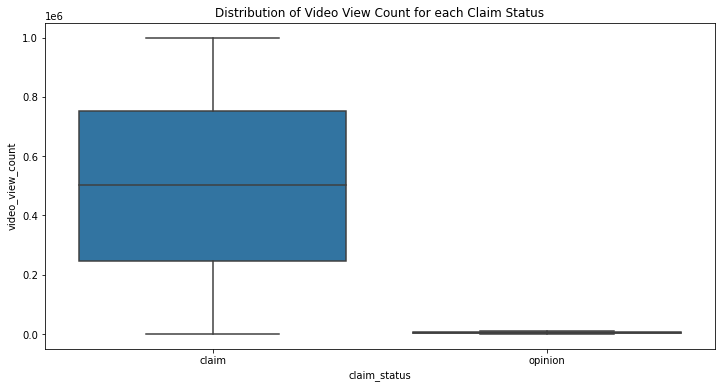

In [29]:
### YOUR CODE HERE ###
plt.figure(figsize=(12,6))
sns.boxplot(x='claim_status', y='video_view_count', data=df)
plt.title("Distribution of Video View Count for each Claim Status")
plt.show()

In [30]:
df['claim_status'].fillna('Unknown', inplace=True)


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to your 'claim_status' column
df['claim_status_encoded'] = le.fit_transform(df['claim_status'])

# Create a mapping from labels to their encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(label_mapping)


{'Unknown': 0, 'claim': 1, 'opinion': 2}


In [34]:
correlation = df['claim_status_encoded'].corr(df['video_view_count'])
print(f'The correlation between claim status and video view count is {correlation}')


The correlation between claim status and video view count is -0.7681704460414707


The correlation coefficient -0.7681704460414707 is a statistical measure that describes the association between the variables `claim_status` and `video_view_count`. 

Correlation values range from -1 to 1. If the correlation is close to 1, it indicates a strong positive relationship between the two variables, meaning that as one variable increases, the other tends to increase as well. If the correlation is close to -1, it indicates a strong negative relationship, meaning that as one variable increases, the other tends to decrease.

Your value of -0.768 suggests a moderately strong negative correlation between `claim_status` and `video_view_count`. This means that as the `claim_status` increases, the `video_view_count` tends to decrease, and vice versa. 

**( note that I encoded these status values as integers so an "increase" means moving from one category to another in the order determined by the label encoder).

The interpretation of this result depends heavily on how the categories of `claim_status` were encoded. Therefore, it would be important to know the encoding scheme to make a substantive interpretation. 

One thing to note is that while the correlation here is relatively strong, correlation does not imply causation. There might be other factors at play influencing both variables. You should be careful not to infer a causal relationship solely based on the observed correlation.

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

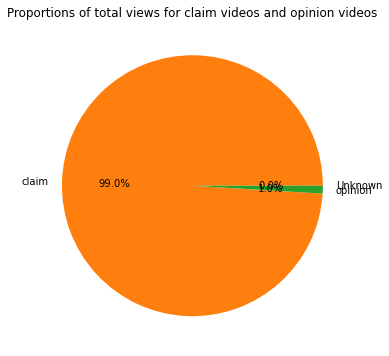

In [35]:
# Create a pie graph
### YOUR CODE HERE ###
# Group by claim_status and calculate total views
total_views_by_claim_status = df.groupby('claim_status')['video_view_count'].sum()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(total_views_by_claim_status, labels = total_views_by_claim_status.index, autopct='%1.1f%%')
plt.title("Proportions of total views for claim videos and opinion videos")
plt.show()


**Question:** What do you notice about the overall view count for claim status?

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [36]:
### YOUR CODE HERE ###

# storing each variable in a list to loop through it
count_vars = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

for column in count_vars:
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the median
    median = df[column].median()
    
    # Calculate the outlier threshold
    outlier_threshold = median + 1.5 * IQR
    
    # Calculate the number of outliers
    outlier_count = len(df[df[column] > outlier_threshold])
    
    print(f"Number of outliers in {column}: {outlier_count}")


Number of outliers in video_view_count: 2343
Number of outliers in video_like_count: 3468
Number of outliers in video_share_count: 3732
Number of outliers in video_download_count: 3733
Number of outliers in video_comment_count: 3882


In this script, the quantile() function is used to calculate the first quartile (Q1) and the third quartile (Q3). 
The IQR is then calculated as the difference between Q3 and Q1. We then calculate the median and determine the outlier threshold by adding 1.5 times the IQR to the median. The outliers are then counted by using a boolean condition to filter the DataFrame and selecting the rows where the count variable exceeds the outlier threshold. The number of rows satisfying this condition (i.e., the number of outliers) is then printed.

**Please note: This code assumes that there are no missing values in these columns. If there are missing values, you might want to handle them first before running this code to avoid any calculation errors.

#### **Scatterplot**

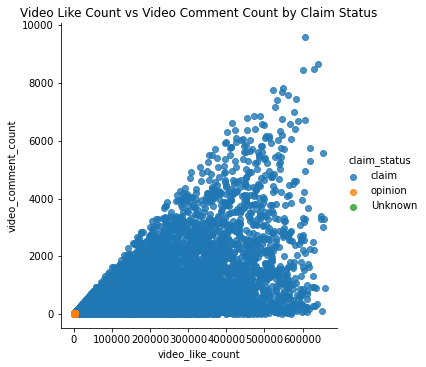

In [38]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` according to 'claim_status'
### YOUR CODE HERE ###

sns.lmplot(x='video_like_count', y='video_comment_count', hue='claim_status', data=df, fit_reg=False)
plt.title('Video Like Count vs Video Comment Count by Claim Status')
plt.show()


You can use seaborn's `lmplot()` function to create a scatterplot with different colors for different claim statuses. Here is an example:

In the code cell above:

- `x='video_like_count'` sets the x-axis to be the `video_like_count` column of the DataFrame.
- `y='video_comment_count'` sets the y-axis to be the `video_comment_count` column of the DataFrame.
- `hue='claim_status'` colors the points according to the `claim_status` column of the DataFrame.
- `data=df` sets the data source to be the DataFrame `df`.
- `fit_reg=False` removes the regression line from the plot.
- `plt.title('Video Like Count vs Video Comment Count by Claim Status')` sets the title of the plot.
- `plt.show()` displays the plot.

This plot will allow us to see how the `video_like_count` and `video_comment_count` variables relate to each other for each category of `claim_status`.

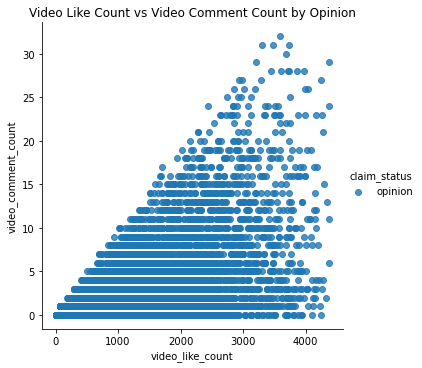

In [42]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` for opinions only
### YOUR CODE HERE ###

# Filter Opinions
opinion_df = df[df['claim_status'] == 'opinion']

# Create scatter plot, make sure to plug in new dataframe
sns.lmplot(x='video_like_count', y='video_comment_count', hue='claim_status', data=opinion_df, fit_reg=False)
plt.title('Video Like Count vs Video Comment Count by Opinion')
plt.show()


The scatterplot data points shoot up vertically and to the right which indicates a positive correlation between the number of likes (`video_like_count` on the x-axis) and the number of comments (`video_comment_count` on the y-axis). This relationship makes sense; videos that get more likes are also likely to get more comments, as both are forms of user engagement.

The fact that most of the data points are concentrated around the lower left of the plot (where both likes and comments are relatively low) suggests that the majority of videos receive a moderate level of engagement. In other words, most videos don't go viral and receive an immense number of likes or comments.

The points extending upwards and to the right represent videos that have received a very high number of likes and comments. These are likely the outliers or the viral videos that have gained a lot of attention. 

In terms of data analysis, this correlation suggests that `video_like_count` might be a good predictor for `video_comment_count`, or vice versa, as they appear to move together. However, we should be cautious about inferring causation from correlation. While it's tempting to say that more likes cause more comments, or more comments cause more likes, the scatterplot alone doesn't tell us that. There could be other factors at play that cause both likes and comments to increase, such as the video content, the time of posting, or the popularity of the author.

You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


# What We Learned

Truthfully; I did not really consider color, contrast, emphasis yet as this was more of an EDA meant give an Ad-hoc analysis, which in and of itself can be very time consuming, and getting granular with details of visualization was not prioritized on my end since I was more focused on the technical analysis portion. That being said, with more time I would be sure to really consider a more neutral blue-ish grey pallette since I want to make the visualizations accessible to all.

However, Labeling was quite important for my analysis, and there was an instance where I had to label encode a category in order to make a correlation of sorts.

The analyses that have been conducted in this thread provide a good starting point for understanding the TikTok data and its potential relevance to your ultimate goal of predicting whether a video is a claim or an opinion. Here's a summary of some key findings and their implications:

1. **Video Engagement Levels and Claim Status**: I found that there is a strong correlation between a video's engagement level (likes, comments, shares, downloads, views) and its claim status. This is a crucial finding as it suggests that these engagement metrics could be significant predictors in TikTok's model. 

2. **Claim Status and Verification Status**: The histograms demonstrated that unverified accounts are more active in terms of both claims and opinions. This could suggest that verification status may not be a strong predictor in distinguishing between claims and opinions, but it could be useful for other types of analysis, like understanding user behavior.

3. **Outlier Analysis**: I identified a number of outliers in the count variables. While outliers can sometimes complicate analysis and modeling, they also can contain valuable information. In the context of social media data, these outliers might represent viral videos. Given the nature of social media, where virality plays a big role, it might be beneficial to include these outliers in TikTok's model.

4. **Correlation Analysis**: The positive correlation found between video_like_count and video_comment_count for opinions suggests that these variables move together, at least for opinion videos. Including both of these variables in your model might lead to multicollinearity, which can impact the performance and interpretability of TikTok's model. It could be worthwhile to further investigate the correlation between these variables for claim videos as well.

5. **Total Views by Claim Status**: The pie chart provided a high-level understanding of the proportion of views attributed to claim videos versus opinion videos. This could be helpful in understanding the overall landscape of claim vs. opinion videos, but it may not directly contribute to the predictive modeling aspect.

In terms of next steps, we might consider conducting further exploratory data analysis, perhaps examining temporal patterns (e.g., does claim status vary by the time of posting?), and looking at other available variables. Additionally, feature engineering could be beneficial - creating new variables from the existing ones might reveal more nuanced patterns.

Finally, given TikTok's goal, supervised machine learning techniques like logistic regression, decision trees, random forests, or gradient boosting could be suitable for building a predictive model. Remember to split the data into training and testing sets to validate your model's performance.

While the analysis has brought valuable insights, building a predictive model will give you more definitive answers on what features are most important in predicting whether a video is a claim or an opinion. The insights gained from this exploratory data analysis will help inform and guide the modeling process.



### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


# Close-Out

Exploratory Data Analysis (EDA) is a critical step in any data science project, including ours, for several reasons:

1. **Understanding the Data**: EDA allows us to understand the properties of the data we're working with, including distributions, outliers, correlations, and potential relationships between variables. This understanding is crucial for making informed decisions during the data preprocessing and model-building stages.

2. **Data Cleaning**: During EDA, we might encounter issues with the data such as missing values, inconsistencies, or errors that need to be addressed before further analysis or modeling. Ignoring these issues could lead to inaccurate or misleading results.

3. **Feature Selection**: By exploring each variable and their relationships, we can identify those that might be useful for predicting the target variable. We can also identify variables that are highly correlated, which might cause multicollinearity in a regression model, or redundant features that can be removed to simplify the model without losing accuracy.

4. **Assumption Checking**: Many statistical and machine learning models make assumptions about the data, such as normality, linearity, or the absence of multicollinearity. EDA can help check whether these assumptions are met.

5. **Informing Model Choice**: The characteristics of our data can guide the choice of modeling techniques. For example, if our target variable is binary, we might choose logistic regression or a classification tree. If our data have a hierarchical structure, we might choose a mixed-effects model or a hierarchical Bayesian model.

6. **Generating Hypotheses**: EDA can help generate hypotheses about the data and the phenomena it represents. These hypotheses can then be tested in the modeling stage.

7. **Telling a Story**: Lastly, EDA can help tell a compelling story about the data. By visualizing the data and summarizing its main characteristics, we can communicate our findings to stakeholders in a clear and persuasive way.

In the context of this project, EDA can help us understand what factors might influence whether a video is a claim or an opinion, identify any data issues that need to be addressed before modeling, select the most relevant features for predicting claim status, and inform the choice of a suitable model. It's a crucial step towards building an effective predictive model.


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.